**Taller 2. Aprendizaje automático**

Nombre: Harold Santiago Aguilera Mulfo

Cédula de ciudadanía: 1000493178

El presente DataSet trata de los precios cotizados en la bolsa de Nueva York de la empresa META. Los datos son extraídos de Yahoo Finance.

**1er punto**

Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos
de Colombia. (Se hará el importe de Yahoo)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

symbol = "META"  # Símbolo de la acción de META
start_date = "2017-12-31"
end_date = "2023-07-05"

# Obtener los datos de precios de acciones utilizando yfinance
data = yf.download(symbol, start=start_date, end=end_date)

print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  177.679993  181.580002  177.550003  181.419998  181.419998   
2018-01-03  181.880005  184.779999  181.330002  184.669998  184.669998   
2018-01-04  184.899994  186.210007  184.100006  184.330002  184.330002   
2018-01-05  185.589996  186.899994  184.929993  186.850006  186.850006   
2018-01-08  187.199997  188.899994  186.330002  188.279999  188.279999   
...                ...         ...         ...         ...         ...   
2023-06-27  282.010010  289.350006  280.649994  287.049988  287.049988   
2023-06-28  284.820007  289.549988  284.059998  285.290009  285.290009   
2023-06-29  284.500000  286.570007  280.690002  281.529999  281.529999   
2023-06-30  284.760010  289.049988  284.420013  286.980011  286.980011   
2023-07-03  286.700012  289.399994  284.850

Realice las tareas de limpieza necesarias

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1384 entries, 2018-01-02 to 2023-07-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1384 non-null   float64
 1   High       1384 non-null   float64
 2   Low        1384 non-null   float64
 3   Close      1384 non-null   float64
 4   Adj Close  1384 non-null   float64
 5   Volume     1384 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 75.7 KB


In [ ]:
import pandas as pd

# Verificar valores faltantes
valores_faltantes = data.isnull().sum()
print("Valores faltantes:\n", valores_faltantes)
print("----------------------------------------")

# Verificar valores nulos
valores_nulos = data.isna().sum()
print("Valores nulos:\n", valores_nulos)
print("----------------------------------------")

# Verificar valores atípicos en las columnas
columnas_atipicas = ['Open', 'High', 'Low', 'Close', 'Adj Close']
desviacion_estandar = 3  # Definir el límite de desviación estándar para identificar valores atípicos

for columna in columnas_atipicas:
    media = data[columna].mean()
    desviacion = data[columna].std()
    umbral_superior = media + (desviacion_estandar * desviacion)
    umbral_inferior = media - (desviacion_estandar * desviacion)

    valores_atipicos = data[(data[columna] > umbral_superior) | (data[columna] < umbral_inferior)]
    print(f"Valores atípicos en {columna}:\n", valores_atipicos)
print("----------------------------------------")
# Verificar valores duplicados
duplicados = data.duplicated()
print("Valores duplicados:\n", duplicados)

Valores faltantes:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
----------------------------------------
Valores nulos:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
----------------------------------------
Valores atípicos en Open:
 Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Valores atípicos en High:
 Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Valores atípicos en Low:
 Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Valores atípicos en Close:
 Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Valores atípicos en Adj Close:
 Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
----------------------------------------
Valores duplicados:
 Date
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    

In [ ]:
# Renombrar las columnas del DataFrame
data.rename(columns={'Open': 'apertura', 'High': 'maximo', 'Low': 'minimo', 'Close': 'cierre', 'Adj Close': 'cierre_adj', 'Volume': 'volumen'}, inplace=True)

print(data.columns)


Index(['apertura', 'maximo', 'minimo', 'cierre', 'cierre_adj', 'volumen'], dtype='object')


In [ ]:
data.head()

,apertura,maximo,minimo,cierre,cierre_adj,volumen
Date,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


In [ ]:
data.describe()

,apertura,maximo,minimo,cierre,cierre_adj,volumen
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1.384000e+03
mean,216.956705,220.042269,214.081539,217.101308,217.101308,2.443600e+07
std,65.388429,65.943800,64.770578,65.372096,65.372096,1.674306e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,171.575005,174.027500,168.829998,171.500000,171.500000,1.537680e+07
50%,195.320000,198.680000,193.139999,196.075005,196.075005,2.045110e+07
75%,265.534996,268.987503,261.722511,265.070000,265.070000,2.823242e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [ ]:
import numpy as np

# Calcular la media de la columna 'cierre_et'
media = data['cierre'].mean()

# Crear una nueva columna 'cierre_categorico' basada en la media
data['cierre_categorico'] = np.where(data['cierre'] > media, 0, 1)

# Verificar los resultados
print(data[['cierre', 'cierre_categorico']].head())

                cierre  cierre_categorico
Date                                     
2018-01-02  181.419998                  1
2018-01-03  184.669998                  1
2018-01-04  184.330002                  1
2018-01-05  186.850006                  1
2018-01-08  188.279999                  1


Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de
prueba serán el 15% del dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['apertura', 'maximo', 'minimo', 'cierre_adj', 'volumen']]
y = data['cierre_categorico']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Dimensiones de los datos de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones de los datos de prueba:", X_test.shape, y_test.shape)

Dimensiones de los datos de entrenamiento: (1176, 5) (1176,)
Dimensiones de los datos de prueba: (208, 5) (208,)


Aplicar el algoritmo de clasificación de los K vecinos más cercanos

In [ ]:
cantidad_datos = len(data['cierre'])

# Imprimir la cantidad de datos
print("Cantidad de datos:", cantidad_datos)

Cantidad de datos: 1384


In [ ]:
data.tail()

,apertura,maximo,minimo,cierre,cierre_adj,volumen,cierre_categorico
Date,,,,,,,
2023-06-27,282.010010,289.350006,280.649994,287.049988,287.049988,26108300,0
2023-06-28,284.820007,289.549988,284.059998,285.290009,285.290009,16722100,0
2023-06-29,284.500000,286.570007,280.690002,281.529999,281.529999,15395700,0
2023-06-30,284.760010,289.049988,284.420013,286.980011,286.980011,19676000,0
2023-07-03,286.700012,289.399994,284.850006,286.019989,286.019989,8629300,0


In [ ]:
# Aplicación del algortimo de K vecinos
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score

# Crear un clasificador de KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el clasificador utilizando los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo de KNN:", round(precision, 3))

Precisión del modelo de KNN: 0.534


In [ ]:
# Calcular Score de los datos de entrenamiento y de los datos de prueba
train_scores={}
test_scores={}
neighbors=np.arange(1,10)
for neighbor in neighbors:
  Knn=KNeighborsClassifier(n_neighbors=neighbor)
  Knn.fit(X_train,y_train)
  train_scores[neighbor]=Knn.score(X_train,y_train)
  test_scores[neighbor]=Knn.score(X_test,y_test)

print('------------------')
print('Resultado de Score de entrenamiento')
print(train_scores)
print('------------------')
print('Resultado de Score de Prueba')
print(test_scores)

------------------
Resultado de Score de entrenamiento
{1: 1.0, 2: 0.7772108843537415, 3: 0.7797619047619048, 4: 0.7253401360544217, 5: 0.7125850340136054, 6: 0.6879251700680272, 7: 0.6955782312925171, 8: 0.6709183673469388, 9: 0.6794217687074829}
------------------
Resultado de Score de Prueba
{1: 0.5673076923076923, 2: 0.5144230769230769, 3: 0.5336538461538461, 4: 0.5336538461538461, 5: 0.5576923076923077, 6: 0.5240384615384616, 7: 0.6201923076923077, 8: 0.5721153846153846, 9: 0.6105769230769231}


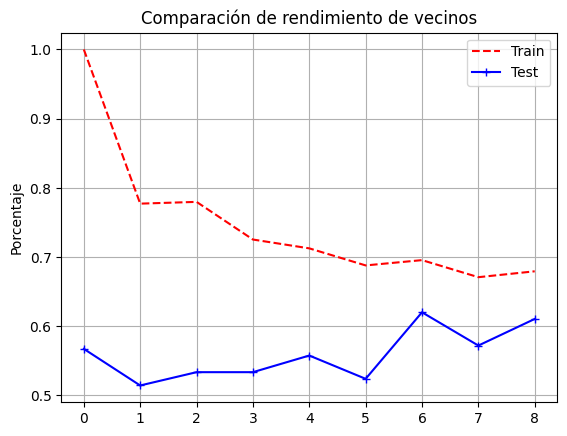

In [ ]:
# Gráfico del rendimiento de los datos de entrenamiento y de prueba
import matplotlib.pyplot as plt
plt.plot(list(train_scores.values()), 'r--', label='Train')
plt.plot(list(test_scores.values()), 'b+-', label='Test')
plt.legend()
plt.ylabel('Porcentaje')
plt.title('Comparación de rendimiento de vecinos')
plt.grid()
plt.show()

En este caso, 6 vecinos parece ser un número adecuado para obtener un buen rendimiento general. El modelo ha alcanzado un buen nivel de generalización, lo que significa que es capaz de clasificar correctamente tanto los datos de entrenamiento como los datos no vistos previamente en el conjunto de prueba. Por el resultado del score, se puede afirmar que el porcentaje de aciertos es aceptable (Score = 0.534)

**El siguiente DataSet muestra porcentajes y cifras sobre el mercado laboral. Los datos son obtenidos del Departamento Administrativo Nacional de Estadística (DANE)**

**2do Punto**

Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

In [ ]:
import pandas as pd

In [ ]:
# Se obtienen los datos de un archivo .xlsx
df1 = pd.read_excel('mercadolaboral.xlsx')
df1.head()

,Año,Mes,población en edad de trabajar,TGP,TO,TD,TS,Población total,Población en edad de trabajar,Fuerza de trabajo,Ocupados,Desocupados,Población fuera de la fuerza laboral,Subocupados,Fuerza de trabajo potencial
0,2001,Enero,68.372188,69.053538,57.575237,16.622326,11.825744,38378.406,26240.156,18119.756,15107.832,3011.925,8120.400,2142.796,0.0
1,2001,Febrero,68.400370,68.948903,56.928209,17.434206,11.677268,38419.624,26279.165,18119.196,14960.258,3158.938,8159.969,2115.827,0.0
2,2001,Marzo,68.425957,68.387911,57.574460,15.811933,11.972872,38456.836,26314.458,17995.908,15150.407,2845.501,8318.550,2154.627,0.0
3,2001,Abril,68.453948,65.224009,55.756693,14.515078,10.466480,38498.053,26353.437,17188.768,14693.805,2494.963,9164.669,1799.059,0.0
4,2001,Mayo,68.481856,65.406094,56.225804,14.035833,10.633666,38538.005,26391.541,17261.676,14838.856,2422.820,9129.865,1835.549,0.0


Realice las tareas de limpieza necesarias

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Año                                   269 non-null    int64  
 1   Mes                                   269 non-null    object 
 2   población en edad de trabajar         269 non-null    float64
 3   TGP                                   269 non-null    float64
 4   TO                                    269 non-null    float64
 5   TD                                    269 non-null    float64
 6   TS                                    269 non-null    float64
 7   Población total                       269 non-null    float64
 8   Población en edad de trabajar         269 non-null    float64
 9   Fuerza de trabajo                     269 non-null    float64
 10  Ocupados                              269 non-null    float64
 11  Desocupados        

In [ ]:
# Crear un nuevo DataFrame con nombres abreviados y en minúsculas
df = df1.rename(columns={'población en edad de trabajar': 'pet1', 'TGP': 'tgp', 'TO': 'to', 'TD': 'td',
                                  'TS': 'ts', 'Población total': 'pt', 'Población en edad de trabajar': 'pet2',
                                  'Fuerza de trabajo': 'ft', 'Ocupados': 'o', 'Desocupados': 'd',
                                  'Población fuera de la fuerza laboral': 'pffl', 'Subocupados': 's',
                                  'Fuerza de trabajo potencial': 'ftp', 'Mes':'mes', 'Año':'año'}, inplace = False)
df

,año,mes,pet1,tgp,to,td,ts,pt,pet2,ft,o,d,pffl,s,ftp
0,2001,Enero,68.372188,69.053538,57.575237,16.622326,11.825744,38378.406,26240.156,18119.756,15107.832,3011.925,8120.400,2142.796,0.000
1,2001,Febrero,68.400370,68.948903,56.928209,17.434206,11.677268,38419.624,26279.165,18119.196,14960.258,3158.938,8159.969,2115.827,0.000
2,2001,Marzo,68.425957,68.387911,57.574460,15.811933,11.972872,38456.836,26314.458,17995.908,15150.407,2845.501,8318.550,2154.627,0.000
3,2001,Abril,68.453948,65.224009,55.756693,14.515078,10.466480,38498.053,26353.437,17188.768,14693.805,2494.963,9164.669,1799.059,0.000
4,2001,Mayo,68.481856,65.406094,56.225804,14.035833,10.633666,38538.005,26391.541,17261.676,14838.856,2422.820,9129.865,1835.549,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023,Enero,77.368500,63.384200,54.697800,13.704400,7.737400,50784.856,39291.484,24904.580,21491.566,3413.013,14386.904,1926.957,1957.684
265,2023,Febrero,77.391100,63.754800,56.516600,11.353100,8.404700,50830.535,39338.322,25080.061,22232.690,2847.371,14258.261,2107.914,1615.742
266,2023,Marzo,77.411900,64.334500,57.880100,10.032500,8.498700,50871.873,39380.868,25335.493,22793.699,2541.795,14045.375,2153.197,1543.249
267,2023,Abril,77.435500,64.608100,57.679100,10.724700,8.058900,50917.729,39428.415,25473.964,22741.957,2732.006,13954.451,2052.933,1685.574


In [ ]:
# Diccionario de mapeo para convertir nombres de meses a números de mes
diccionario_meses = {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

# Aplicar el mapeo a la columna "mes"
df['mes'] = df['mes'].map(diccionario_meses)

# Verificar los cambios
print(df['mes'])

0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int64


In [ ]:
import pandas as pd

# Verificar valores faltantes
valores_faltantes = df.isnull().sum()
print("Valores faltantes:\n", valores_faltantes)

# Verificar valores nulos
valores_nulos = df.isna().sum()
print("Valores nulos:\n", valores_nulos)

# Verificar valores duplicados
duplicados = df.duplicated()
print("Valores duplicados:\n", duplicados)


Valores faltantes:
 año     0
mes     0
pet1    0
tgp     0
to      0
td      0
ts      0
pt      0
pet2    0
ft      0
o       0
d       0
pffl    0
s       0
ftp     0
dtype: int64
Valores nulos:
 año     0
mes     0
pet1    0
tgp     0
to      0
td      0
ts      0
pt      0
pet2    0
ft      0
o       0
d       0
pffl    0
s       0
ftp     0
dtype: int64
Valores duplicados:
 0      False
1      False
2      False
3      False
4      False
       ...  
264    False
265    False
266    False
267    False
268    False
Length: 269, dtype: bool


In [ ]:
df.head()

,año,mes,pet1,tgp,to,td,ts,pt,pet2,ft,o,d,pffl,s,ftp
0,2001,1,68.372188,69.053538,57.575237,16.622326,11.825744,38378.406,26240.156,18119.756,15107.832,3011.925,8120.400,2142.796,0.0
1,2001,2,68.400370,68.948903,56.928209,17.434206,11.677268,38419.624,26279.165,18119.196,14960.258,3158.938,8159.969,2115.827,0.0
2,2001,3,68.425957,68.387911,57.574460,15.811933,11.972872,38456.836,26314.458,17995.908,15150.407,2845.501,8318.550,2154.627,0.0
3,2001,4,68.453948,65.224009,55.756693,14.515078,10.466480,38498.053,26353.437,17188.768,14693.805,2494.963,9164.669,1799.059,0.0
4,2001,5,68.481856,65.406094,56.225804,14.035833,10.633666,38538.005,26391.541,17261.676,14838.856,2422.820,9129.865,1835.549,0.0


In [ ]:
df.describe()

,año,mes,pet1,tgp,to,td,ts,pt,pet2,ft,o,d,pffl,s,ftp
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,2011.713755,6.434944,73.268550,65.925510,58.128783,11.856080,10.553522,44065.017219,32385.697844,21306.867342,18805.541952,2501.325387,11078.830502,2232.610940,170.464238
std,6.486196,3.464162,2.846837,2.406397,2.998017,2.439469,2.239448,3606.710693,3884.701944,2278.532859,2279.831760,471.737989,1873.683051,435.841381,496.473998
min,2001.000000,1.000000,68.372188,53.445600,42.497100,7.563100,0.000000,38378.406000,26240.156000,17188.768000,14693.805000,1763.467000,8075.142000,0.000000,0.000000
25%,2006.000000,3.000000,70.673149,64.380200,56.762600,9.989100,9.486600,41066.892000,29023.014000,18853.458000,16563.920000,2171.099000,9840.488000,2028.991000,0.000000
50%,2012.000000,6.000000,73.563300,66.447000,58.401500,11.355034,10.551600,43629.793000,32095.535000,21901.958000,19280.235000,2405.278000,10691.142000,2324.996000,0.000000
75%,2017.000000,9.000000,75.935200,67.552363,60.083100,13.079197,11.952900,46613.041000,35395.689000,23284.178000,20843.717000,2690.759000,11992.182000,2507.113000,0.000000
max,2023.000000,12.000000,77.459400,70.617500,64.008000,21.972000,15.093869,50962.460000,39475.193000,25473.964000,22793.699000,4695.063000,17514.242000,2948.197000,2099.169000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   año     269 non-null    int64  
 1   mes     269 non-null    int64  
 2   pet1    269 non-null    float64
 3   tgp     269 non-null    float64
 4   to      269 non-null    float64
 5   td      269 non-null    float64
 6   ts      269 non-null    float64
 7   pt      269 non-null    float64
 8   pet2    269 non-null    float64
 9   ft      269 non-null    float64
 10  o       269 non-null    float64
 11  d       269 non-null    float64
 12  pffl    269 non-null    float64
 13  s       269 non-null    float64
 14  ftp     269 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 31.6 KB


Aplicar el algoritmo de agrupamiento de las K medias

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
# Características relevantes para el análisis
columnas = ['pet1', 'tgp', 'to', 'td', 'ts', 'pt', 'pet2', 'ft', 'o', 'd', 'pffl', 's', 'ftp']
df_seleccionado = df[columnas]

In [ ]:
# Se crea un objeto KMeans con el número deseado de clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Se ajusta el modelo a los datos seleccionados
kmeans.fit(df_seleccionado)

# Obtener las etiquetas de los clusters asignados a cada muestra
etiquetas = kmeans.labels_

# Agregar las etiquetas al DataFrame
df_seleccionado['Cluster'] = etiquetas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-a17ac399cfc4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Cluster'] = etiquetas


In [ ]:
# Calcular el puntaje de la agrupación
puntaje = kmeans.score(df_seleccionado)

# Imprimir el puntaje
print("Puntaje de la agrupación:", puntaje)

Puntaje de la agrupación: -1619273109.4948444


In [ ]:
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pet1     269 non-null    float64
 1   tgp      269 non-null    float64
 2   to       269 non-null    float64
 3   td       269 non-null    float64
 4   ts       269 non-null    float64
 5   pt       269 non-null    float64
 6   pet2     269 non-null    float64
 7   ft       269 non-null    float64
 8   o        269 non-null    float64
 9   d        269 non-null    float64
 10  pffl     269 non-null    float64
 11  s        269 non-null    float64
 12  ftp      269 non-null    float64
 13  Cluster  269 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 28.5 KB


In [ ]:
# Usar el algoritmo de K-Means para realizar una agrupación de datos en clusters
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4,max_iter=300)
Kmeans.fit(df_seleccionado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pet1     269 non-null    float64
 1   tgp      269 non-null    float64
 2   to       269 non-null    float64
 3   td       269 non-null    float64
 4   ts       269 non-null    float64
 5   pt       269 non-null    float64
 6   pet2     269 non-null    float64
 7   ft       269 non-null    float64
 8   o        269 non-null    float64
 9   d        269 non-null    float64
 10  pffl     269 non-null    float64
 11  s        269 non-null    float64
 12  ftp      269 non-null    float64
 13  Cluster  269 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 28.5 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


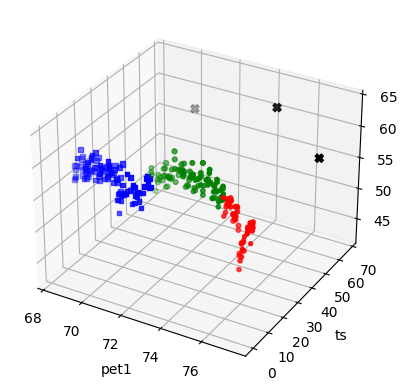

In [ ]:
# Visualización de los grupos generados por el algoritmo de K-Means
objetivos = kmeans.fit_predict(df_seleccionado)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_seleccionado.loc[objetivos==0, 'pet1'], df_seleccionado.loc[objetivos==0, 'ts'], df_seleccionado.loc[objetivos==0, 'to'],
           s=df_seleccionado.loc[objetivos==0, 'ts'], color='green')

ax.scatter(df_seleccionado.loc[objetivos==1, 'pet1'], df_seleccionado.loc[objetivos==1, 'ts'], df_seleccionado.loc[objetivos==1, 'to'],
           s=df_seleccionado.loc[objetivos==1, 'ts'], color='red', marker='o')

ax.scatter(df_seleccionado.loc[objetivos==2, 'pet1'], df_seleccionado.loc[objetivos==2, 'ts'], df_seleccionado.loc[objetivos==2, 'to'],
           s=df_seleccionado.loc[objetivos==2, 'ts'], color='blue', marker='s')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=35, color='black', marker='X')

ax.set_xlabel('pet1')
ax.set_ylabel('ts')
ax.set_zlabel('to')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

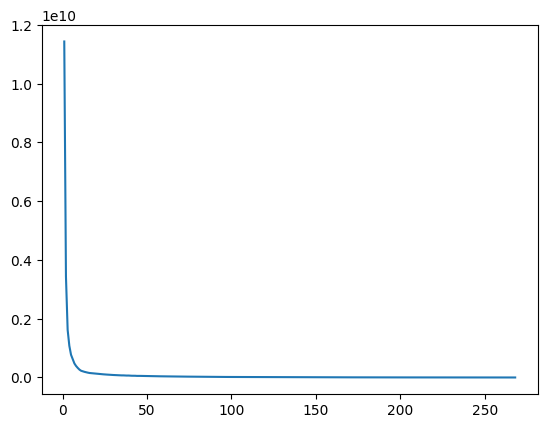

In [ ]:
# Calcular la inercia del modelo
inercias = []
for i in range (1, len (df_seleccionado+1)):
  kmeans=KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(df_seleccionado)
  inercias.append(kmeans.inertia_)

plt.plot (range(1, len (df_seleccionado+1)), inercias)

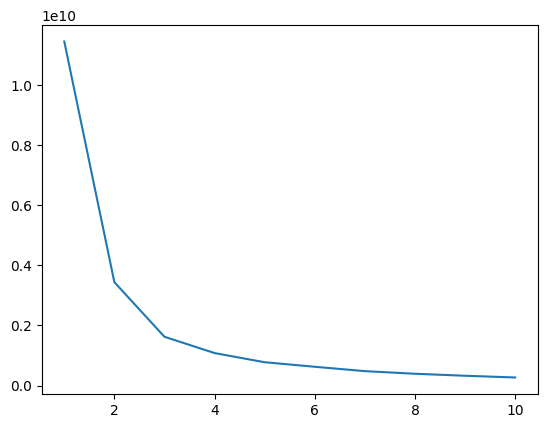

In [ ]:
# Gráfico de la inercia de los datos
plt.plot (range(1, 11), inercias[:10])

Se considera que el punto de inflexión en la gráfica ocurre en 3, lo cual se considera el número óptimo de grupos.